Coded in Google Colab so drive.mount was used to access files

# Project 4 Report
Ben Giles & Jesse Bao 

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.model_selection import KFold
drive.mount('/content/drive')
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict

Mounted at /content/drive


In [ ]:
#path = '/content/drive/MyDrive/Colab Notebooks/Project 4 /data/HYRRS 0622 Master and SNI combined long form (1).xlsx'
#path = '/content/drive/MyDrive/Project 4 /data/Project4Data.csv'
path = '/content/drive/MyDrive/Colab Notebooks/Project 4 /data/Project4Data.csv' # BEN PATH
df = pd.read_csv(path)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,6,9,21,26,76,279,371,458,474,493,497,499,945,946) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**EDA**

We first loaded in the data set to check out what it looked like and also took a look at documentation. We noticed there were over a thousand features and lots of missing values so we figured the best way to approach this data might be to get rid of the unrelated features.

We knew from a previous homework assignment that the 6 drug_use30 columns indicated whether a user used a drug and the frequency so we took those columns, converted them into binary classifications of whether a user used a drug or not, and made it our ‘Y’ dataframe with the correct results. We realized there were values corresponding directly to drug use called ‘cocaine’ or ‘marijuana’ so one of the first things we did with the dataset was to drop these columns.  We then took a look at the missing values in the dataset and sorted an array of them by the percentage of total values missing using a missing_values table function that we wrote.  


In [ ]:
df.head()

,pid,screen1_sleep,screen1_sleep_18_text,screen_voucher,screen2_long,screen3_age,realm_score,consent,consent_agree,pid_20,pid_30,pid_5_text,city_in,citysite,city_becamehomeless,genderidentity_1,genderidentity_2,genderidentity_3,genderidentity_4,genderidentity_5,genderidentity_6,genderidentity_6_text,genderidentity_7,genderidentity_7_text,birthsex,sexualorientation,sexualorientation_4_text,giscale_1,giscale_2,giscale_3,giscale_4,giscale_5,giscale_6,giscale_7,ethnic,ethnic_7_text,a12monthhomeless_1,a12monthhomeless_2,a12monthhomeless_3,a12monthhomeless_4,...,alt_STItested_di,alt_dpvconcur_nomiss,alt_dpvconcur_di,alt_encsafesex_nomiss,alt_encsafesex_di,alt_encHIVSTItesting_nomiss,alt_encHIVSTItesting_di,alt_advice_nomiss,alt_advice_di,alt_money_nomiss,alt_money_di,alt_servinfo_nomiss,alt_servinfo_di,phqdep_di,sedatives_allsample,stimulants_allsample,opioids_allsample,pdmfr1dr,pdmfrmultidr,pdmfrfakepr,pdmstolefrdr,pdmfreefrfdandrev,pdmboughtfrfdandrev,pdmstolefrfdandrev,pdmbuyfrdealer,pdmbuyfronline,pdmfranydr,pdmfranyfrandrev,pdmfrstealing,num_moves,new_helpseek_scale_1,new_helpseek_scale_2,new_helpseek_scale_3,new_helpseek_scale_4,new_helpseek_scale_5,new_helpseek_scale_6,new_helpseek_scale_7,new_helpseek_scale_8,sum_helpseek_scale,erorhosp_ever
0,1004,15,.,NaN,NaN,24.0,7,1.0,2.0,7/21/16,Andrea,D0112x,3.0,4,"New York, NY",1.0,0.0,0.0,0.0,0.0,0.0,.,0.0,NaN,1.0,4.0,Pansexual,2.0,3.0,4.0,2.0,3.0,2.0,5.0,1.0,.,1.0,0.0,0.0,0.0,...,0.0,0,0.0,0,0.0,0,0.0,-495,NaN,0,0.0,1,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,17.0,0.0
1,1004,15,.,NaN,NaN,24.0,7,1.0,2.0,7/21/16,Andrea,D0112x,3.0,4,"New York, NY",1.0,0.0,0.0,0.0,0.0,0.0,.,0.0,NaN,1.0,4.0,Pansexual,2.0,3.0,4.0,2.0,3.0,2.0,5.0,1.0,.,1.0,0.0,0.0,0.0,...,0.0,0,0.0,0,0.0,0,0.0,-495,NaN,0,0.0,1,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,17.0,0.0
2,1004,15,.,NaN,NaN,24.0,7,1.0,2.0,7/21/16,Andrea,D0112x,3.0,4,"New York, NY",1.0,0.0,0.0,0.0,0.0,0.0,.,0.0,NaN,1.0,4.0,Pansexual,2.0,3.0,4.0,2.0,3.0,2.0,5.0,1.0,.,1.0,0.0,0.0,0.0,...,0.0,0,0.0,0,0.0,0,0.0,-495,NaN,0,0.0,1,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,17.0,0.0
3,1004,15,.,NaN,NaN,24.0,7,1.0,2.0,7/21/16,Andrea,D0112x,3.0,4,"New York, NY",1.0,0.0,0.0,0.0,0.0,0.0,.,0.0,NaN,1.0,4.0,Pansexual,2.0,3.0,4.0,2.0,3.0,2.0,5.0,1.0,.,1.0,0.0,0.0,0.0,...,0.0,0,0.0,0,0.0,0,0.0,-495,NaN,0,0.0,1,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,17.0,0.0
4,1004,15,.,NaN,NaN,24.0,7,1.0,2.0,7/21/16,Andrea,D0112x,3.0,4,"New York, NY",1.0,0.0,0.0,0.0,0.0,0.0,.,0.0,NaN,1.0,4.0,Pansexual,2.0,3.0,4.0,2.0,3.0,2.0,5.0,1.0,.,1.0,0.0,0.0,0.0,...,0.0,0,0.0,0,0.0,0,0.0,-495,NaN,0,0.0,1,1.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,17.0,0.0


In [ ]:

df = df.drop(["cocaine", "crack", "meth","heroin","ecstasy"], axis = 1)

In [ ]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    

In [ ]:
pd.set_option('max_rows', 50)

In [ ]:
temp =  df[['druguse_30_1','druguse_30_2','druguse_30_3','druguse_30_4','druguse_30_5','druguse_30_6']]
temp.head()
temp2 = temp.isin([2,3,4,5,6])

In [ ]:
Y = temp2*1

In [ ]:
Y.columns = ["cocaine", 'crack', 'heroine', 'meth', 'ecstacy', 'marijuana']

In [ ]:
cocaine = Y[["cocaine"]]

In [ ]:
missing_values_table(df)

Your selected dataframe has 1205 columns.
There are 1133 columns that have missing values.


,Missing Values,% of Total Values
gang_fmr,6920,100.0
genderidentity_7_text,6920,100.0
jugg_provide_8_text,6920,100.0
hcv,6920,100.0
exchangesex_itemsold_17_text,6905,99.8
...,...,...
n_alt_hepc_disclosed,5,0.1
city_becamehomeless,5,0.1
hsged,5,0.1
q33,5,0.1


In [ ]:
misval = missing_values_table(df)

Your selected dataframe has 1205 columns.
There are 1133 columns that have missing values.


In [ ]:
missing_df = missing_values_table(df);
missing_columns = list(missing_df[missing_df['% of Total Values'] > 5.7].index)
print('We will remove %d columns.' % len(missing_columns))

Your selected dataframe has 1205 columns.
There are 1133 columns that have missing values.
We will remove 528 columns.


In [ ]:
print(missing_columns)

['gang_fmr', 'genderidentity_7_text', 'jugg_provide_8_text', 'hcv', 'exchangesex_itemsold_17_text', 'exchangesex_itemsold', 'jugg_provide_8', 'jugg_provide_9', 'doctor_hiv', 'doctor_hcv', 'alt_sharedniddlewith', 'jugg_provide_6', 'jugg_provide_7', 'jugg_provide_5', 'alt_crackwith', 'alt_iduwith', 'jugg_provide_2', 'discrim_reasons_13_text', 'jugg_provide_3', 'jugg_provide_4', 'jugg_provide_1', 'howleavefc_6_text', 'jugg_write', 'q28_1', 'alt_heroinwith', 'q31_1', 'q32_1', 'alt_sharedniddlewith_di', 'q25_1', 'look_sexpart_14_text', 'alt_spicewith', 'screen_voucher', 'jugg_gen', 'jugg_race', 'jugg_age_1', 'jugg_enc', 'jugg_supp', 'alt_iduwith_di', 'alt_crackwith_di', 'alt_pdmwith', 'doctor_std', 'q29_1', 'alt_ecstasywith', 'alt_heroinwith_di', 'look_sexpart_12', 'q26_1', 'look_sexpart_10', 'q30_1', 'reasonhomeless_18_text', 'alt_cocainewith', 'alt_spicewith_di', 'q44', 'look_sexpart_14', 'needle_share_30', 'look_sexpart_7', 'alt_pdmwith_di', 'look_sexpart_8', 'q27_1', 'lastsextype_6', 'l

In [ ]:
newdf = df.drop(['jugg_provide_8_text', 'hcv', 'gang_fmr', 'genderidentity_7_text', 'exchangesex_itemsold_17_text', 'exchangesex_itemsold', 'jugg_provide_8', 'jugg_provide_9', 'doctor_hiv', 'doctor_hcv', 'alt_sharedniddlewith', 'jugg_provide_6', 'jugg_provide_5', 'jugg_provide_7', 'alt_crackwith', 'alt_iduwith', 'jugg_provide_2', 'discrim_reasons_13_text', 'jugg_provide_3', 'jugg_provide_4', 'jugg_provide_1', 'howleavefc_6_text', 'jugg_write', 'q28_1', 'alt_heroinwith', 'q31_1', 'q32_1', 'alt_sharedniddlewith_di', 'q25_1', 'look_sexpart_14_text', 'alt_spicewith', 'screen_voucher', 'jugg_race', 'jugg_gen', 'jugg_age_1', 'jugg_supp', 'jugg_enc', 'alt_iduwith_di', 'alt_crackwith_di', 'alt_pdmwith', 'doctor_std', 'q29_1', 'alt_ecstasywith', 'alt_heroinwith_di', 'look_sexpart_12', 'q26_1', 'q30_1', 'look_sexpart_10', 'reasonhomeless_18_text', 'alt_cocainewith', 'alt_spicewith_di', 'q44', 'look_sexpart_14', 'needle_share_30', 'look_sexpart_7', 'alt_pdmwith_di', 'look_sexpart_8', 'q27_1', 'lastsextype_6', 'look_sexpart_11', 'lastsextype_5', 'look_sexpart_9', 'alt_ecstasywith_di', 'q23_1', 'look_sexpart_6', 'sexualorientation_4_text', 'lastsextype_4', 'alt_bingewith', 'look_sexpart_4', 'alt_cocainewith_di', 'look_sexpart', 'q22_11', 'vict_instruct', 'locationlatitude', 'locationlongitude', 'locationaccuracy', 'infoonline_11_text', 'look_sexpart_5', 'q73_x', 'subtreat_pastyear', 'localyouth', 'citycode', 'discrim_reasons_13', 'gang_prov_socspt', 'gang_prov_clothes', 'gang_prov_shelter', 'gang_prov_food', 'gang_prov_safety', 'exchangesex_itemsnew_17', 'exchangesex_itemsnew_9', 'gang_prov_money', 'gang_prov_protect', 'q73_1', 'exchangesex_itemsnew_10', 'exchangesex_itemsnew_16', 'exchangesex_itemsnew_15', 'exchangesex_itemsnew_11', 'exchangesex_itemsnew_8', 'vict_nosexexam_4', 'vict_nosexeam_any', 'vict_nosexexam_6', 'vict_nosexexam_5', 'vict_nosexexam_1', 'vict_nosexexam_2', 'vict_nosexexam_3', 'gang_name', 'exchangesex_itemsnew_14', 'perp_gun_gang', 'perp_gun_gang_di', 'lastsextype_7', 'exchangesex_itemsnew_7', 'screen2_long', 'exchangesex_itemsnew_6', 'exchangesex_itemsnew_12', 'exchangesex_itemsnew_5', 'exchangesex_itemsnew_2', 'gang_prov_any', 'podcardfrdoc', 'podcardfrselfmade', 'podcardfrstolen', 'podcardfrfriend', 'exchangesex_itemsnew_13', 'gang_age_new', 'gang_samerace', 'gang_diverserace', 'gang_male', 'gang_female', 'gang_age_1', 'gang_divgender', 'gang_difrace', 'ever_sextradetraffic', 'gang_race', 'gang_gender', 'last_sextrade_online', 'tradesex_condom', 'gang_frmr', 'pdmstolefrdr', 'lastsextype_8', 'pdmfrstealing', 'pdmfranyfrandrev', 'pdmfrmultidr', 'pdmbuyfronline', 'pdmbuyfrdealer', 'pdmstolefrfdandrev', 'pdmboughtfrfdandrev', 'pdmfrfakepr', 'pdmfreefrfdandrev', 'internet', 'freefrirel', 'sedatives', 'pdmfranydr', 'pdmfr1dr', 'purdealer', 'stolenfrirel', 'alt_disclosesuithtontime', 'purfrirel', 'opioids', 'stolendoc', 'fake', 'twodoctors', 'onedoctor', 'stimulants', 'exchangesex_itemsnew_3', 'exchangesex_itemsnew_4', 'lastsextype_9', 'exchangesex_itemsnew_17_text', 'q24_1', 'exchangesex_itemsnew_1', 'vict_sexlassltexam', 'vict_sexlassltexam_d', 'vict_sexlassltexam_di', 'alt_bingewith_di', 'q22_8', 'q22_5', 'q22_2', 'er_12', 'vict_ass_gun_gang', 'vict_ass_gun_inj_di', 'vict_ass_gun_inj', 'q22_6', 'q22_7', 'military', 'q8_1', 'alt_discloseSTI', 'ttllegalincome', 'q42_1', 'q22_3', 'alt_discloseHIV', 'q72_1', 'alt_gang', 'q22_4', 'ttlpaidempl_1', 'giscale_6', 'giscale_7', 'giscale_4', 'giscale_5', 'giscale_3', 'giscale_2', 'q41_1', 'giscale_1', 'alt_tlkhepc', 'q40_1', 'q10_1', 'ttllegalhours_1', 'hospit_12', 'socmeduse_8_text', 'marj_card2_4', 'marj_card2_3', 'vict_whynoexam_5', 'vict_whynoexam_2', 'alt_disclosesuitht', 'alt_potwith', 'rx_how_30_9', 'vict_whynoexam_3', 'vict_whynoexam_1', 'rx_how_30_4', 'rx_how_30_3', 'gang_provide_9', 'alt_concur', 'marj_card2_2', 'rx_how_30_2', 'q11_1', 'gang_provide_8', 'rx_how_30_7', 'rx_type_30_4', 'q18_1', 'vict_whynoexam_4', 'rx_how_30_1', 'rx_type_30_1', 'q15_1', 'rx_how_30_8', 'q21_1', 'rx_how_30_6', 'vict_whynoexam_6', 'agefc_1', 'howleavefc', 'ageoutjj', 'alt_alwayssafesex', 'alt_tlkHIVSTItesting', 'rx_how_30_5', 'rx_type_30_2', 'gang_provide_7', 'rx_type_30_3', 'gang_provide_2', 'genderidentity_6_text', 'gang_provide_3', 'gang_provide_1', 'ttlfcplacements_1', 'q44_1', 'rx_type_30_4_text', 'lengthfc_1', 'gang_provide_5', 'q19_1', 'alt_tlksafesex', 'q17_1', 'preg_numunplan', 'preg_numchildliving', 'currentfc', 'medjail', 'preg_numbchild', 'gang_provide_4', 'gang_provide_6', 'ther_12', 'socservonline_10_text', 'screen1_sleep_18_text', 'mh_overall_6', 'witness_gun_gang', 'witness_gun_gang_di', 'mh_overall_7', 'q16_1', 'ethnic_7_text', 'q22_9', 'mh_overall_7_text', 'alt_HIVtested', 'alt_STItested', 'alt_safesex', 'marj_card2_1', 'alt_money', 'q20_1', 'socmeduse_9', 'alt_servinfo', 'alt_dpvmj', 'consent', 'socservonline_14', 'gang_aff_4', 'mh_overall_5', 'med_12', 'socmeduse_8', 'gang_aff_9', 'alt_dpvconcur', 'genderidentity_7', 'gang_aff_5', 'alt_tlkpolice', 'life_sexpartners', 'genderidentity_6', 'gang_provide_8_text', 'gang_aff_8', 'socmeduse_6', 'q55_1', 'genderidentity_5', 'reasonhomeless_13', 'mh_overall_1', 'genderidentity_3', 'reasonhomeless_10', 'alt_discloseSTI_di', 'socservonline_10', 'reasonhomeless_8', 'gangcat', 'condom_attitude_12', 'condom_attitude_13', 'condom_attitude_14', 'reasonhomeless_15', 'condom_attitude_11', 'reasonhomeless_7', 'q39_4', 'genderidentity_4', 'reasonhomeless_6', 'reasonhomeless_4', 'socmeduse_7', 'reasonhomeless_12', 'arrest_unstable', 'q52_1', 'mh_overall_3', 'jail_homeless', 'gang_aff_6', 'everjail', 'alt_tlkdrinksubuse', 'reasonhomeless_9', 'socservonline_8', 'reasonhomeless_2', 'q43_4', 'socservonline_9', 'alt_discloseHEPC_di', 'q12_1', 'infoonline_5', 'infoonline_7', 'gang_aff_7', 'q53_1', 'reasonhomeless_18', 'socservonline_2', 'infoonline_11', 'marj_access_3', 'perceivhiv_2', 'perceivhiv_4', 'infoonline_4', 'perceivhiv_1', 'perceivhiv_3', 'infoonline_2', 'mh_overall_4', 'gang_aff_3', 'reasonhomeless_14', 'infoonline_6', 'infoonline_3', 'q22_10', 'socservonline_3', 'discrim_reasons_6', 'reasonhomeless_16', 'reasonhomeless_3', 'socmeduse_2', 'a12monthhomeless_8', 'alt_advice', 'reasonhomeless_17', 'reasonhomeless_5', 'infoonline_9', 'reasonhomeless_11', 'gang_aff_2', 'infoonline_8', 'techaccess_4', 'binge_30', 'infoonline_12', 'socservonline_4', 'mh_overall_2', 'hpv_2', 'alt_tabletorpc', 'socservonline_7', 'a12monthhomeless_6', 'techaccess_5', 'q43_5', 'socservonline_6', 'infoonline_10', 'discrim_reasons_3', 'discrim_reasons_7', 'gang_aff_9_text', 'discrim_reasons_9', 'q56_1', 'q34_1', 'infoonline_1', 'socmeduse_4', 'techaccess_2', 'q57_1', 'discrim_reasons_1', 'marj_access_2', 'a12monthhomeless_7', 'discrim_reasons_8', 'gang_aff_1', 'socservonline_1', 'a12monthhomeless_2', 'socservonline_5', 'q72_x', 'consent_agree', 'alt_disclosesuithtontime_di', 'q14_1', 'concurrency', 'consistent_condom', 'num_sexpart_3mo', 'condom_use_3mo_1', 'q45_1', 'q35_1', 'alt_encsafesex', 'alt_potwith_di', 'a12monthhomeless_4', 'q39_2', 'discrim_reasons_2', 'discrim_reasons_11', 'q48_1', 'alt_encHIVSTItesting', 'alt_1perweek', 'q51_1', 'discrim_reasons_5', 'alt_discloseHIV_di', 'techaccess_3', 'gang_aff_10', 'marj_access_4', 'a12monthhomeless_3', 'q36_1', 'marj_access_5', 'socmeduse_5', 'q50_1', 'marj_access_1', 'gang_enc', 'alt_hangout', 'pot_frfriend', 'pot_frselfgrow', 'pot_frstore', 'pot_frdealer', 'discrim_reasons_4', 'alt_disclosesuitht_di', 'q37_1', 'genderidentity_2', 'discrim_reasons_12', 'a12monthhomeless_5', 'alt_phone', 'hcvpos_1', 'q22_1', 'discrim_reasons_10', 'alt_dpvpdm', 'socservonline_12', 'gangaff', 'ipvbi', 'alt_dpvecstasy', 'socmeduse_3', 'q49_1', 'q39_3', 'hcvpos', 'hepc_status', 'q39_1', 'q47_1', 'num_city_moved', 'alt_dpvcocaine', 'alt_dpvsynmj', 'socmed_connect_2', 'socmed_connect_2_di', 'socmed_connect_1', 'socmed_connect_1_di', 'ipvvic', 'socmedtime', 'genderidentity_1', 'reasonhomeless_1', 'a12monthhomeless_1', 'alt_dpvinject', 'alt_dpvheroin', 'alt_dpvcrack', 'q9_1', 'stiorhivpos', 'q38_1', 'socmeduse_1', 'streetfamily', 'streetfamily_di', 'ipvperp', 'last_sui', 'last_sui_di', 'last_condom_use', 'sex_3mo', 'last_condom_di', 'exch_heroin', 'exch_pysch', 'exch_rx', 'exch_weap', 'exch_meth', 'exch_otherill', 'exch_marij', 'exch_alcohol', 'exch_ciggs', 'exch_transport', 'exch_shelter', 'exch_food', 'exch_cellphone', 'exch_x', 'exch_money', 'exch_basic', 'ever_sextrade', 'sex_online', 'afsex13', 'ex_debute', 'std_status', 'sti_pos', 'ttlinformalincome', 'discrim_reasons_10_di', 'discrim_reasons_9_di', 'discrim_reasons_8_di', 'discrim_reasons_6_di', 'discrim_reasons_5_di', 'discrim_reasons_4_di', 'discrim_reasons_3_di', 'discrim_reasons_11_di', 'discrim_reasons_2_di', 'discrim_reasons_1_di', 'discrim_reasons_12_di', 'discrim_reasons_7_di', 'hiv_pos', 'hiv_status', 'techaccess_1', 'vict_ipv_vic_inrel', 'vict_ipv_perp_inrel', 'sub_treatment_ever', 'subtreat_pastyear_di', 'q1_3_text', 'both_ipv_vicperp_inrel'] , axis='columns')

In [ ]:
newdf = newdf.drop(['druguse_30_1','druguse_30_2','druguse_30_3','druguse_30_4','druguse_30_5','druguse_30_6'], axis = 1)

In [ ]:
newdf.head()
newdf = newdf.replace('\.+', np.nan, regex=True)
df

,pid,screen1_sleep,screen1_sleep_18_text,screen_voucher,screen2_long,screen3_age,realm_score,consent,consent_agree,pid_20,pid_30,pid_5_text,city_in,citysite,city_becamehomeless,genderidentity_1,genderidentity_2,genderidentity_3,genderidentity_4,genderidentity_5,genderidentity_6,genderidentity_6_text,genderidentity_7,genderidentity_7_text,birthsex,sexualorientation,sexualorientation_4_text,giscale_1,giscale_2,giscale_3,giscale_4,giscale_5,giscale_6,giscale_7,ethnic,ethnic_7_text,a12monthhomeless_1,a12monthhomeless_2,a12monthhomeless_3,a12monthhomeless_4,...,alt_STItested_di,alt_dpvconcur_nomiss,alt_dpvconcur_di,alt_encsafesex_nomiss,alt_encsafesex_di,alt_encHIVSTItesting_nomiss,alt_encHIVSTItesting_di,alt_advice_nomiss,alt_advice_di,alt_money_nomiss,alt_money_di,alt_servinfo_nomiss,alt_servinfo_di,phqdep_di,sedatives_allsample,stimulants_allsample,opioids_allsample,pdmfr1dr,pdmfrmultidr,pdmfrfakepr,pdmstolefrdr,pdmfreefrfdandrev,pdmboughtfrfdandrev,pdmstolefrfdandrev,pdmbuyfrdealer,pdmbuyfronline,pdmfranydr,pdmfranyfrandrev,pdmfrstealing,num_moves,new_helpseek_scale_1,new_helpseek_scale_2,new_helpseek_scale_3,new_helpseek_scale_4,new_helpseek_scale_5,new_helpseek_scale_6,new_helpseek_scale_7,new_helpseek_scale_8,sum_helpseek_scale,erorhosp_ever
0,1004,15,.,NaN,NaN,24.0,7,1.0,2.0,7/21/16,Andrea,D0112x,3.0,4,"New York, NY",1.0,0.0,0.0,0.0,0.0,0.0,.,0.0,NaN,1.0,4.0,Pansexual,2.0,3.0,4.0,2.0,3.0,2.0,5.0,1.0,.,1.0,0.0,0.0,0.0,...,0.0,0,0.0,0,0.0,0,0.0,-495,NaN,0,0.0,1,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,17.0,0.0
1,1004,15,.,NaN,NaN,24.0,7,1.0,2.0,7/21/16,Andrea,D0112x,3.0,4,"New York, NY",1.0,0.0,0.0,0.0,0.0,0.0,.,0.0,NaN,1.0,4.0,Pansexual,2.0,3.0,4.0,2.0,3.0,2.0,5.0,1.0,.,1.0,0.0,0.0,0.0,...,0.0,0,0.0,0,0.0,0,0.0,-495,NaN,0,0.0,1,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,17.0,0.0
2,1004,15,.,NaN,NaN,24.0,7,1.0,2.0,7/21/16,Andrea,D0112x,3.0,4,"New York, NY",1.0,0.0,0.0,0.0,0.0,0.0,.,0.0,NaN,1.0,4.0,Pansexual,2.0,3.0,4.0,2.0,3.0,2.0,5.0,1.0,.,1.0,0.0,0.0,0.0,...,0.0,0,0.0,0,0.0,0,0.0,-495,NaN,0,0.0,1,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,17.0,0.0
3,1004,15,.,NaN,NaN,24.0,7,1.0,2.0,7/21/16,Andrea,D0112x,3.0,4,"New York, NY",1.0,0.0,0.0,0.0,0.0,0.0,.,0.0,NaN,1.0,4.0,Pansexual,2.0,3.0,4.0,2.0,3.0,2.0,5.0,1.0,.,1.0,0.0,0.0,0.0,...,0.0,0,0.0,0,0.0,0,0.0,-495,NaN,0,0.0,1,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,17.0,0.0
4,1004,15,.,NaN,NaN,24.0,7,1.0,2.0,7/21/16,Andrea,D0112x,3.0,4,"New York, NY",1.0,0.0,0.0,0.0,0.0,0.0,.,0.0,NaN,1.0,4.0,Pansexual,2.0,3.0,4.0,2.0,3.0,2.0,5.0,1.0,.,1.0,0.0,0.0,0.0,...,0.0,0,0.0,0,0.0,0,0.0,-495,NaN,0,0.0,1,1.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,17.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6915,9081,6,NaN,NaN,2.0,22.0,4,1.0,2.0,31017,ray,c0303r,7.0,13,san jose,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1,1.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,27.0,1.0
6916,9081,6,NaN,NaN,2.0,22.0,4,1.0,2.0,31017,ray,c0303r,7.0,13,san jose,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,27.0,1.0
6917,9081,6,NaN,NaN,2.0,22.0,4,1.0,2.0,31017,ray,c0303r,7.0,13,san jose,1.0,Na

In [ ]:
newdf = newdf.replace('\.+', np.nan, regex=True)
df

,pid,screen1_sleep,screen1_sleep_18_text,screen_voucher,screen2_long,screen3_age,realm_score,consent,consent_agree,pid_20,pid_30,pid_5_text,city_in,citysite,city_becamehomeless,genderidentity_1,genderidentity_2,genderidentity_3,genderidentity_4,genderidentity_5,genderidentity_6,genderidentity_6_text,genderidentity_7,genderidentity_7_text,birthsex,sexualorientation,sexualorientation_4_text,giscale_1,giscale_2,giscale_3,giscale_4,giscale_5,giscale_6,giscale_7,ethnic,ethnic_7_text,a12monthhomeless_1,a12monthhomeless_2,a12monthhomeless_3,a12monthhomeless_4,...,alt_STItested_di,alt_dpvconcur_nomiss,alt_dpvconcur_di,alt_encsafesex_nomiss,alt_encsafesex_di,alt_encHIVSTItesting_nomiss,alt_encHIVSTItesting_di,alt_advice_nomiss,alt_advice_di,alt_money_nomiss,alt_money_di,alt_servinfo_nomiss,alt_servinfo_di,phqdep_di,sedatives_allsample,stimulants_allsample,opioids_allsample,pdmfr1dr,pdmfrmultidr,pdmfrfakepr,pdmstolefrdr,pdmfreefrfdandrev,pdmboughtfrfdandrev,pdmstolefrfdandrev,pdmbuyfrdealer,pdmbuyfronline,pdmfranydr,pdmfranyfrandrev,pdmfrstealing,num_moves,new_helpseek_scale_1,new_helpseek_scale_2,new_helpseek_scale_3,new_helpseek_scale_4,new_helpseek_scale_5,new_helpseek_scale_6,new_helpseek_scale_7,new_helpseek_scale_8,sum_helpseek_scale,erorhosp_ever
0,1004,15,.,NaN,NaN,24.0,7,1.0,2.0,7/21/16,Andrea,D0112x,3.0,4,"New York, NY",1.0,0.0,0.0,0.0,0.0,0.0,.,0.0,NaN,1.0,4.0,Pansexual,2.0,3.0,4.0,2.0,3.0,2.0,5.0,1.0,.,1.0,0.0,0.0,0.0,...,0.0,0,0.0,0,0.0,0,0.0,-495,NaN,0,0.0,1,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,17.0,0.0
1,1004,15,.,NaN,NaN,24.0,7,1.0,2.0,7/21/16,Andrea,D0112x,3.0,4,"New York, NY",1.0,0.0,0.0,0.0,0.0,0.0,.,0.0,NaN,1.0,4.0,Pansexual,2.0,3.0,4.0,2.0,3.0,2.0,5.0,1.0,.,1.0,0.0,0.0,0.0,...,0.0,0,0.0,0,0.0,0,0.0,-495,NaN,0,0.0,1,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,17.0,0.0
2,1004,15,.,NaN,NaN,24.0,7,1.0,2.0,7/21/16,Andrea,D0112x,3.0,4,"New York, NY",1.0,0.0,0.0,0.0,0.0,0.0,.,0.0,NaN,1.0,4.0,Pansexual,2.0,3.0,4.0,2.0,3.0,2.0,5.0,1.0,.,1.0,0.0,0.0,0.0,...,0.0,0,0.0,0,0.0,0,0.0,-495,NaN,0,0.0,1,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,17.0,0.0
3,1004,15,.,NaN,NaN,24.0,7,1.0,2.0,7/21/16,Andrea,D0112x,3.0,4,"New York, NY",1.0,0.0,0.0,0.0,0.0,0.0,.,0.0,NaN,1.0,4.0,Pansexual,2.0,3.0,4.0,2.0,3.0,2.0,5.0,1.0,.,1.0,0.0,0.0,0.0,...,0.0,0,0.0,0,0.0,0,0.0,-495,NaN,0,0.0,1,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,17.0,0.0
4,1004,15,.,NaN,NaN,24.0,7,1.0,2.0,7/21/16,Andrea,D0112x,3.0,4,"New York, NY",1.0,0.0,0.0,0.0,0.0,0.0,.,0.0,NaN,1.0,4.0,Pansexual,2.0,3.0,4.0,2.0,3.0,2.0,5.0,1.0,.,1.0,0.0,0.0,0.0,...,0.0,0,0.0,0,0.0,0,0.0,-495,NaN,0,0.0,1,1.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,17.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6915,9081,6,NaN,NaN,2.0,22.0,4,1.0,2.0,31017,ray,c0303r,7.0,13,san jose,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1,1.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,27.0,1.0
6916,9081,6,NaN,NaN,2.0,22.0,4,1.0,2.0,31017,ray,c0303r,7.0,13,san jose,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,27.0,1.0
6917,9081,6,NaN,NaN,2.0,22.0,4,1.0,2.0,31017,ray,c0303r,7.0,13,san jose,1.0,Na

In [ ]:
newdf.isnull().sum()

pid                        0
screen1_sleep              0
screen3_age               15
realm_score             1120
pid_20                    65
                        ... 
new_helpseek_scale_6     235
new_helpseek_scale_7     240
new_helpseek_scale_8     230
sum_helpseek_scale       275
erorhosp_ever             95
Length: 671, dtype: int64

In [ ]:
df.drop(["realm_score"], axis = 1)

,pid,screen1_sleep,screen1_sleep_18_text,screen_voucher,screen2_long,screen3_age,consent,consent_agree,pid_20,pid_30,pid_5_text,city_in,citysite,city_becamehomeless,genderidentity_1,genderidentity_2,genderidentity_3,genderidentity_4,genderidentity_5,genderidentity_6,genderidentity_6_text,genderidentity_7,genderidentity_7_text,birthsex,sexualorientation,sexualorientation_4_text,giscale_1,giscale_2,giscale_3,giscale_4,giscale_5,giscale_6,giscale_7,ethnic,ethnic_7_text,a12monthhomeless_1,a12monthhomeless_2,a12monthhomeless_3,a12monthhomeless_4,a12monthhomeless_5,...,alt_STItested_di,alt_dpvconcur_nomiss,alt_dpvconcur_di,alt_encsafesex_nomiss,alt_encsafesex_di,alt_encHIVSTItesting_nomiss,alt_encHIVSTItesting_di,alt_advice_nomiss,alt_advice_di,alt_money_nomiss,alt_money_di,alt_servinfo_nomiss,alt_servinfo_di,phqdep_di,sedatives_allsample,stimulants_allsample,opioids_allsample,pdmfr1dr,pdmfrmultidr,pdmfrfakepr,pdmstolefrdr,pdmfreefrfdandrev,pdmboughtfrfdandrev,pdmstolefrfdandrev,pdmbuyfrdealer,pdmbuyfronline,pdmfranydr,pdmfranyfrandrev,pdmfrstealing,num_moves,new_helpseek_scale_1,new_helpseek_scale_2,new_helpseek_scale_3,new_helpseek_scale_4,new_helpseek_scale_5,new_helpseek_scale_6,new_helpseek_scale_7,new_helpseek_scale_8,sum_helpseek_scale,erorhosp_ever
0,1004,15,.,NaN,NaN,24.0,1.0,2.0,7/21/16,Andrea,D0112x,3.0,4,"New York, NY",1.0,0.0,0.0,0.0,0.0,0.0,.,0.0,NaN,1.0,4.0,Pansexual,2.0,3.0,4.0,2.0,3.0,2.0,5.0,1.0,.,1.0,0.0,0.0,0.0,1.0,...,0.0,0,0.0,0,0.0,0,0.0,-495,NaN,0,0.0,1,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,17.0,0.0
1,1004,15,.,NaN,NaN,24.0,1.0,2.0,7/21/16,Andrea,D0112x,3.0,4,"New York, NY",1.0,0.0,0.0,0.0,0.0,0.0,.,0.0,NaN,1.0,4.0,Pansexual,2.0,3.0,4.0,2.0,3.0,2.0,5.0,1.0,.,1.0,0.0,0.0,0.0,1.0,...,0.0,0,0.0,0,0.0,0,0.0,-495,NaN,0,0.0,1,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,17.0,0.0
2,1004,15,.,NaN,NaN,24.0,1.0,2.0,7/21/16,Andrea,D0112x,3.0,4,"New York, NY",1.0,0.0,0.0,0.0,0.0,0.0,.,0.0,NaN,1.0,4.0,Pansexual,2.0,3.0,4.0,2.0,3.0,2.0,5.0,1.0,.,1.0,0.0,0.0,0.0,1.0,...,0.0,0,0.0,0,0.0,0,0.0,-495,NaN,0,0.0,1,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,17.0,0.0
3,1004,15,.,NaN,NaN,24.0,1.0,2.0,7/21/16,Andrea,D0112x,3.0,4,"New York, NY",1.0,0.0,0.0,0.0,0.0,0.0,.,0.0,NaN,1.0,4.0,Pansexual,2.0,3.0,4.0,2.0,3.0,2.0,5.0,1.0,.,1.0,0.0,0.0,0.0,1.0,...,0.0,0,0.0,0,0.0,0,0.0,-495,NaN,0,0.0,1,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,17.0,0.0
4,1004,15,.,NaN,NaN,24.0,1.0,2.0,7/21/16,Andrea,D0112x,3.0,4,"New York, NY",1.0,0.0,0.0,0.0,0.0,0.0,.,0.0,NaN,1.0,4.0,Pansexual,2.0,3.0,4.0,2.0,3.0,2.0,5.0,1.0,.,1.0,0.0,0.0,0.0,1.0,...,0.0,0,0.0,0,0.0,0,0.0,-495,NaN,0,0.0,1,1.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,17.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6915,9081,6,NaN,NaN,2.0,22.0,1.0,2.0,31017,ray,c0303r,7.0,13,san jose,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1,1.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,27.0,1.0
6916,9081,6,NaN,NaN,2.0,22.0,1.0,2.0,31017,ray,c0303r,7.0,13,san jose,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,...,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,27.0,1.0
6917,9081,6,NaN,NaN,2.0,22.0,1.0,2.0,31017,ray,c0303r,7.0

In [ ]:
newdf = newdf.fillna(1)

In [ ]:
newdf.isnull().sum()

pid                     0
screen1_sleep           0
screen3_age             0
realm_score             0
pid_20                  0
                       ..
new_helpseek_scale_6    0
new_helpseek_scale_7    0
new_helpseek_scale_8    0
sum_helpseek_scale      0
erorhosp_ever           0
Length: 671, dtype: int64

In [ ]:
!pip install Cython
!pip install scikit-multilearn
from skmultilearn.problem_transform import BinaryRelevance


     |████████████████████████████████| 92kB 4.0MB/s 


In [ ]:
X = newdf
y = Y

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6920 entries, 0 to 6919
Columns: 671 entries, pid to erorhosp_ever
dtypes: float64(595), int64(70), object(6)
memory usage: 35.4+ MB


In [ ]:
X = X.select_dtypes(exclude=['object'])

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6920 entries, 0 to 6919
Columns: 665 entries, pid to erorhosp_ever
dtypes: float64(595), int64(70)
memory usage: 35.1 MB


In [ ]:
#X = np.array(X, dtype=float)


In [ ]:
X

,pid,screen1_sleep,screen3_age,city_in,citysite,birthsex,sexualorientation,ethnic,firsthomeless_1,timehomeless_ever,travelerever,timehomeless_recent,selfhomeless,education,inschool,fostercare,jjinvolve,everarrest,incomegen_12mo_1,incomegen_12mo_2,incomegen_12mo_3,incomegen_12mo_4,incomegen_12mo_5,incomegen_12mo_6,incomegen_12mo_7,incomegen_12mo_8,incomegen_12mo_9,incomegen_12mo_10,incomegen_12mo_11,incomegen_12mo_12,incomegen_12mo_13,incomegen_12mo_14,incomegen_12mo_15,incomegen_12mo_16,incomegen_12mo_17,working,sex_ever,online_sexpart,condom_eff_1,condom_eff_2,...,alt_discloseHEPC_nomissing,alt_disclosesuitht_nomissing,alt_disclosesuithtontimenomiss,alt_concur_nomiss,alt_concur_di,alt_tlkpolice_nomiss,alt_tlkpolice_di,alt_safesex_nomiss,alt_safesex_di,alt_alwayssafesex_nomiss,alt_alwayssafesex_di,alt_STItested_nomiss,alt_STItested_di,alt_dpvconcur_nomiss,alt_dpvconcur_di,alt_encsafesex_nomiss,alt_encsafesex_di,alt_encHIVSTItesting_nomiss,alt_encHIVSTItesting_di,alt_advice_nomiss,alt_advice_di,alt_money_nomiss,alt_money_di,alt_servinfo_nomiss,alt_servinfo_di,phqdep_di,sedatives_allsample,stimulants_allsample,opioids_allsample,num_moves,new_helpseek_scale_1,new_helpseek_scale_2,new_helpseek_scale_3,new_helpseek_scale_4,new_helpseek_scale_5,new_helpseek_scale_6,new_helpseek_scale_7,new_helpseek_scale_8,sum_helpseek_scale,erorhosp_ever
0,1004,15,24.0,3.0,4,1.0,4.0,1.0,19.0,8.0,2.0,2.0,1.0,7.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,2.0,...,2,0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,-495,1.0,0,0.0,1,0.0,1.0,0.0,0.0,0.0,4.0,2.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,17.0,0.0
1,1004,15,24.0,3.0,4,1.0,4.0,1.0,19.0,8.0,2.0,2.0,1.0,7.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,2.0,...,2,0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,-495,1.0,0,0.0,1,0.0,1.0,0.0,0.0,0.0,4.0,2.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,17.0,0.0
2,1004,15,24.0,3.0,4,1.0,4.0,1.0,19.0,8.0,2.0,2.0,1.0,7.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,2.0,...,2,0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,-495,1.0,0,0.0,1,0.0,1.0,0.0,0.0,0.0,4.0,2.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,17.0,0.0
3,1004,15,24.0,3.0,4,1.0,4.0,1.0,19.0,8.0,2.0,2.0,1.0,7.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,2.0,...,2,0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,-495,1.0,0,0.0,1,0.0,1.0,0.0,0.0,0.0,4.0,2.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,17.0,0.0
4,1004,15,24.0,3.0,4,1.0,4.0,1.0,19.0,8.0,2.0,2.0,1.0,7.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,3.0,2.0,...,2,0,0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,-495,1.0,0,0.0,1,1.0,1.0,0.0,0.0,0.0,4.0,2.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0,17.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6915,9081,6,22.0,7.0,13,1.0,2.0,1.0,16.0,7.0,3.0,6.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,3.0,2.0,...,1,1,1,1,0.0,1,0.0,1,1.0,1,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1,1.0,1,0.0,1.0,0.0,0.0,1.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,27.0,1.0
6916,9081,6,22.0,7.0,13,1.0,2.0,1.0,16.0,7.0,3.0,6.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,3.0,2.0,...,1,1,1,1,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1,0.0,1.0,0.0,0.0,1.0,4.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,4.0,27.0,1.0
6917,9081,6,22.0,7.0,13,1.0,2.0,1.0,16.0,7.0,3.0,6.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,3.0,2.0,...,1,1,1,1,0.0,1,1.0,1,0.0,1,0.0,1,0.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
binaryrandom = RandomForestClassifier(random_state=42, n_estimators= 500, min_samples_split=5, max_features = "auto", max_depth=8 )
binaryrandom.fit(X, Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
print(cross_val_score(binaryrandom, X, cocaine,cv = 10, scoring= 'roc_auc'))
print(cross_val_score(binaryrandom, X, cocaine,cv = 10))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

[0.97261941 0.94496018 0.93459164 0.9575139  0.91065746 0.94408025
 0.98039216 0.98197604 0.97509789 0.95230762]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

[0.90606936 0.8916185  0.86416185 0.89017341 0.84104046 0.86271676
 0.87716763 0.8699422  0.89595376 0.90606936]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=83)
print(cross_val_score(neigh, X, cocaine,cv = 10, scoring= 'roc_auc'))
print(cross_val_score(neigh, X, cocaine,cv = 10))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

[0.5280992  0.34602637 0.12270667 0.34632701 0.37924384 0.40243008
 0.55882353 0.22749938 0.02256295 0.58987784]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

[0.27745665 0.42774566 0.4017341  0.53323699 0.47398844 0.82803468
 0.82803468 0.82803468 0.35115607 0.21242775]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier(random_state = 42)
decision.fit(X,cocaine)
print(cross_val_score(decision, X, cocaine,cv = 10, scoring= 'roc_auc'))
print(cross_val_score(decision, X, cocaine,cv = 10))

[0.86441697 0.79702876 0.80333495 0.68843035 0.65788933 0.73755995
 0.68843035 0.83985217 0.83548917 0.71735815]
[0.9132948  0.88439306 0.81213873 0.8699422  0.81936416 0.84104046
 0.8699422  0.92774566 0.92052023 0.86271676]


In [ ]:
importance = binaryrandom.feature_importances_
importance_df = pd.DataFrame(importance, index=X.columns, 
                      columns=["Importance"])

In [ ]:
importance_df = importance_df.sort_values(by = ["Importance"], ascending= False)

In [ ]:
trim = importance_df[importance_df.Importance > .002]

In [ ]:
trim

,Importance
spice,0.085704
harddrug30wospice,0.076792
harddrug30_spinc,0.076722
inject_30,0.025791
inject,0.019780
...,...
ego_crack,0.002175
helpseek_scale_3,0.002155
new_helpseek_scale_3,0.002135
n_alt_tlk_hepc_test,0.002094


In [ ]:
indexNamesArr = trim.index.values

In [ ]:
listOfRowIndexLabels = list(indexNamesArr)

In [ ]:
listOfRowIndexLabels

['spice',
 'harddrug30wospice',
 'harddrug30_spinc',
 'inject_30',
 'inject',
 'rx_30',
 'ego_cocaine',
 'ego_ecstasy',
 'marj_30',
 'pdm',
 'needleshare',
 'alt_cocainewith_nomissing',
 'alt_ecstasywith_nomissing',
 'anypot',
 'ego_heroin',
 'alt_dpvcocaine_nomissing',
 'alc_30',
 'alt_dpvheroin_nomissing',
 'alt_dpvinject_nomissing',
 'alt_heroinwith_nomissing',
 'sum_cage_msignored',
 'alt_dpvecstasy_nomissing',
 'alt_iduwith_nomissing',
 'sum_helpseek_scale',
 'sum_vict_biasattack',
 'sum_phq9',
 'alt_sharedniddlewith_nomissing',
 'adhd_dx_7',
 'mh_depress_9',
 'vict_biasattack_7',
 'sum_cage',
 'alt_dpvsynmj_nomissing',
 'pid',
 'ego_spice',
 'cage2',
 'stress_streets_8',
 'adhd_dx_3',
 'opioids_allsample',
 'q38shldbemissing',
 'sedatives_allsample',
 'alt_dpvcrack_nomissing',
 'new_stress_streets_8',
 'alt_gang_nomissing',
 'stress_streets_10',
 'alt_tlkhepc_nomissing',
 'sum_perc_stress',
 'sum_newmh_mult',
 'sum_stress_streets',
 'alt_dpvpdm_nomissing',
 'cage2ormore',
 'helps

In [ ]:
newX = X[['harddrug30wospice',
 'harddrug30_spinc',
 'ego_cocaine',
 'alt_cocainewith_nomissing',
 'rx_30',
 'inject_30',
 'spice',
 'alc_30',
 'alt_dpvcocaine_nomissing',
 'inject',
 'pdm',
 'pid',
 'alt_dpvecstasy_nomissing',
 'marj_30',
 'ego_ecstasy',
 'sum_cage_msignored',
 'stress_streets_8',
 'cage2',
 'alt_ecstasywith_nomissing',
 'new_stress_streets_8',
 'alt_dpvpdm_nomissing',
 'sum_stress_streets',
 'alt_gang_nomissing',
 'sum_phq9',
 'alc_30_di',
 'sum_cope',
 'heavydrinking_30',
 'opioids_allsample',
 'sum_helpseek_scale',
 'sum_newmh_mult',
 'screen1_sleep',
 'num_moves',
 'firsthomeless_1',
 'citysite',
 'sedatives_allsample',
 'newcage2',
 'sumattpreg',
 'alt_dpvcocaine_di',
 'sum_perc_stress',
 'city_in',
 'alt_tlkdrinksubuse_nomissing',
 'sum_cage',
 'newcope_9',
 'screen3_age',
 'cope_9',
 'alt_dpvheroin_nomissing',
 'stress_streets_10',
 'ace_total',
 'timehomeless_recent',
 'descrim_4',
 'sum_vict_biasattack',
 'condom_int_1',
 'alt_dpvinject_nomissing',
 'alt_potwith_nomissing',
 'adhd_dx_7',
 'gangcat3',
 'alt_dpvcrack_nomissing',
 'age',
 'sum_mindfulness',
 'helpseek_scale_1',
 'new_helpseek_scale_1',
 'newdescrim_4',
 'descrim_5',
 'condom_eff_3',
 'descrim_2',
 'alt_advice_nomiss',
 'alt_dpvconcur_nomiss',
 'mh_depress_9',
 'alt_phone_nomissing',
 'incomegen_12mo_12',
 'prep_interest',
 'timehomeless_ever',
 'alt_money_nomiss',
 'newdescrim_5',
 'stress_streets_19',
 'cage2ormore',
 'prepfac_3',
 'condom_eff_5',
 'alt_servinfo_nomiss',
 'num_fc_place',
 'cage1ormore',
 'mh_depress_7',
 'alt_bingewith_nomissing',
 'alt_1perweek_nomissing',
 'prep_doctor',
 'new_stress_streets_14',
 'alt_iduwith_nomissing']]

In [ ]:
binaryrandom.fit(X, cocaine)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
print(cross_val_score(binaryrandom, newX, cocaine,cv = 10, scoring= 'roc_auc'))
print(cross_val_score(binaryrandom, newX, cocaine,cv = 10))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

[0.96795577 0.96291082 0.94566413 0.9680291  0.94009122 0.96093097
 0.98486515 0.98900084 0.986801   0.96436271]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

[0.92774566 0.92052023 0.90028902 0.93352601 0.89884393 0.92052023
 0.89739884 0.93352601 0.94942197 0.90606936]


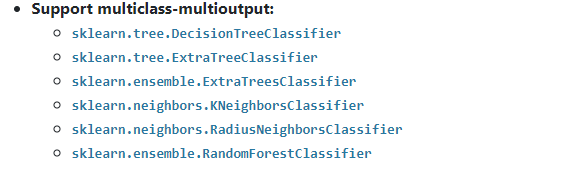

## Models
We were limited on selecting a model due to sklearn not supporting many multi-output multi-label models.  We thought k-nearest neighbors, decision tree, and Random Forest would have the best results so we ended up cross validation testing off of several models and selected the best performing model which was RandomForest.  We then reduced our features to the most significant ones and ran a gridsearch using GridSearchCV to find out the best parameters for our RandomForest model which were {'criterion': 'gini','max_depth': 8, 'max_features': 'auto','n_estimators': 500}

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle

In [ ]:
from sklearn.model_selection import GridSearchCV
random_forest=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv= 10)
CV_rfc.fit(newX, Y)
bestResults = pd.DataFrame(CV_rfc.cv_results_)


In [ ]:
bestResults

NameError: ignored

In [ ]:
CV_rfc.best_params_

In [ ]:
forest = RandomForestClassifier(random_state=42, n_estimators= 500, min_samples_split=5, max_features = "auto", max_depth=8, criterion = 'gini' )

In [ ]:
multiforest = MultiOutputClassifier(forest, n_jobs=-1)
multiforest.fit(newX, Y).predict(newX)

array([[0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1]])

In [ ]:
y_pred = multiforest.predict(newX)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

In [ ]:
#non cross validated matrix
matrix = multilabel_confusion_matrix(Y, y_pred)

print(matrix)
print("[[TP, FP] \n[FN, TN]]")

[[[5730    0]
  [  60 1130]]

 [[6370    0]
  [  35  515]]

 [[6295    0]
  [  55  570]]

 [[5745    0]
  [  10 1165]]

 [[5890    0]
  [  60  970]]

 [[5035    0]
  [   0 1885]]]
[[TP, FP] 
[FN, TN]]


In [ ]:
print(cross_val_score(multiforest, newX, Y,cv = 10))

[0.73988439 0.71098266 0.71820809 0.81936416 0.75433526 0.79768786
 0.87716763 0.8699422  0.84104046 0.74132948]


In [ ]:
#[0.74710983 0.71820809 0.69219653 0.81936416 0.74710983 0.77601156
 #0.88439306 0.8699422  0.82080925 0.73265896]
 # new [0.73988439 0.71098266 0.71820809 0.81936416 0.75433526 0.79768786
 #0.87716763 0.8699422  0.84104046 0.74132948] slightly improved!

In [ ]:
print(cross_val_score(multiforest, newX, Y,cv = 10, scoring = 'roc_auc')) #our final submission

[0.94775069 0.94951602 0.96194959 0.97726652 0.96442029 0.97242683
 0.98566615 0.98205075 0.98167232 0.97226929]


In [ ]:
submissionscore = cross_val_score(multiforest, newX, Y,cv = 10, scoring = 'roc_auc')

In [ ]:
submissionscore = submissionscore.mean()


In [ ]:
submissionscore #submission score

0.9694988448937512

In [ ]:
y_predCV = cross_val_predict(multiforest, newX, Y,cv = 10)

Accuracy : 97% accuracy and 0.97 auc without cross-validating our classifier.
Confusion matrices for individual models :We have a misclassification where we have between 0 and 0.8% false-negatives in the confusion matrices because we are not cross-validating individually here.  


In [ ]:
#cross validated matrix
cvmatrix = multilabel_confusion_matrix(Y, y_predCV)

print(cvmatrix)
print("[[TP, FP] \n[FN, TN]]")

[[[5581  149]
  [ 351  839]]

 [[6330   40]
  [ 415  135]]

 [[6235   60]
  [ 340  285]]

 [[5570  175]
  [ 514  661]]

 [[5814   76]
  [ 434  596]]

 [[4965   70]
  [  25 1860]]]
[[TP, FP] 
[FN, TN]]


Confusion matrices for cross-validated models:  As you can see, after cross-validating the confusion matrices have a lot more false-negatives in it than before with a similar auc score(around 0.94, 0.95)

In [ ]:
print("Accuracy = ",accuracy_score(Y,y_pred))
print("\n")
roc_auc_score(Y, y_pred)

Accuracy =  0.976878612716763




0.9775983669011726

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=83)
multik = MultiOutputClassifier(neigh, n_jobs=-1)
multik.fit(X, Y).predict(X)
print(cross_val_score(multik, X, Y,cv = 10, scoring = 'roc_auc'))

In [ ]:
#[0.58092486 0.58815029 0.54479769 0.5982659  0.59393064 0.53468208
 #0.64595376 0.76734104 0.65462428 0.26300578]

In [ ]:
decision = DecisionTreeClassifier(random_state = 42)
multid = MultiOutputClassifier(decision, n_jobs=-1)
multid.fit(newX, Y).predict(newX)
print(cross_val_score(multid, newX, Y,cv = 10, scoring = 'roc_auc'))

[0.79014163 0.80060963 0.80720256 0.8391302  0.80966888 0.80333566
 0.8238599  0.8061492  0.8112878  0.79440778]


Sample output of DecisionTreeClassifier when we tried it

In [ ]:
#[0.79014163 0.80060963 0.80720256 0.8391302  0.80966888 0.80333566
 0.8238599  0.8061492  0.8112878  0.79440778]

## Real world application 
A classifier of this sort would most likely be used in a social-good project geared towards homeless youths.  False-negatives(more false-negatives than false-positives for our model) in this context where a person who is a drug user is classified as a non-drug user might be bad especially if this classifier is being used to predict potential drug users and stop them before they start using them.  Additionally if the classifier was being used in the case that we are trying to detect current drug-users to help them deal with drugs and their issues, it would also be bad because we are just misclassifying people who use/are very likely to use various drugs.  In this case, it would always be better to misclassify users as a false-positive where they are wrongly misclassified as a drug user because then they could be routed through a help system manually if they are wrongly classified.
